<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [7]:
!curl -o survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  201M    0 31158    0     0  20900      0  2:48:35  0:00:01  2:48:34 20925
  0  201M    0 1371k    0     0   557k      0  0:06:10  0:00:02  0:06:08  557k
  7  201M    7 15.8M    0     0  4689k      0  0:00:44  0:00:03  0:00:41 4692k
 19  201M   19 39.4M    0     0  8570k      0  0:00:24  0:00:04  0:00:20 8575k
 19  201M   19 39.8M    0     0  7475k      0  0:00:27  0:00:05  0:00:22 8230k
 19  201M   19 40.2M    0     0  6368k      0  0:00:32  0:00:06  0:00:26 8266k
 20  201M   20 40.5M    0     0  5564k      0  0:00:37  0:00:07  0:00:30 8029k
 20  201M   20 40.8M    0     0  4944k      0  0:00:41  0:00:08  0:00:33 5122k
 20  201M   20 41.3M    0     0  4472k      0  0:00

#### Install the required libraries and import them


In [8]:
# !pip install pandas

In [9]:
# !pip install matplotlib

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [11]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [12]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [13]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [14]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [39]:
import seaborn as sns

In [36]:
## Write your code here
filtered = pd.read_sql_query('''select CompTotal, count(CompTotal) as cnt from main group by  CompTotal''',conn)
filtered = filtered.dropna()
filtered

,CompTotal,cnt
1,0.000000e+00,127
2,1.000000e+00,12
3,2.000000e+00,4
4,3.000000e+00,1
5,4.000000e+00,4
...,...,...
3333,8.000000e+27,1
3334,1.000000e+44,1
3335,1.000000e+53,1
3336,1.000000e+65,1


<Axes: xlabel='CompTotal', ylabel='cnt'>

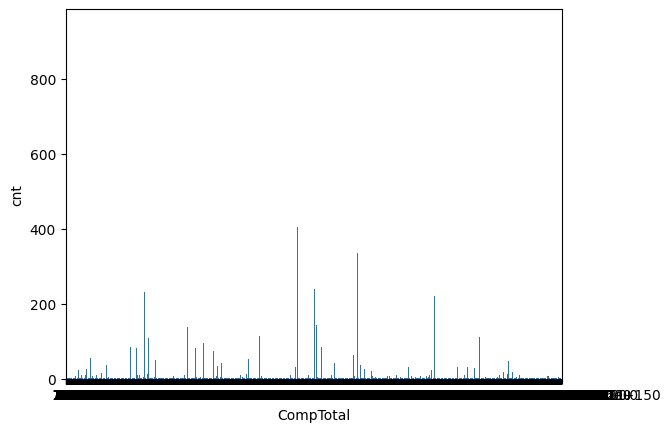

In [42]:
sns.barplot(x='CompTotal', y='cnt', data=filtered)

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [43]:
## Write your code here
filtered = pd.read_sql_query('''select YearsCodePro, count(YearsCodePro) as cnt from main group by YearsCodePro''',conn)
filtered = filtered.dropna()
filtered

,YearsCodePro,cnt
1,1,2639
2,10,3251
3,11,1312
4,12,1777
5,13,1127
6,14,1082
7,15,1635
8,16,946
9,17,814
10,18,867


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, '1'),
  Text(1, 0, '10'),
  Text(2, 0, '11'),
  Text(3, 0, '12'),
  Text(4, 0, '13'),
  Text(5, 0, '14'),
  Text(6, 0, '15'),
  Text(7, 0, '16'),
  Text(8, 0, '17'),
  Text(9, 0, '18'),
  Text(10, 0, '19'),
  Text(11, 0, '2'),
  Text(12, 0, '20'),
  Text(13, 0, '21'),
  Text(14, 0, '22'),
  Text(15, 0, '23'),
  Text(16, 0, '24'),
  Text(17, 0, '25'),
  Text(18, 0, '26'),
  Text(19, 0, '27'),
  Text(20, 0, '28'),
  Text(21, 0, '29'),
  Text(22, 0, '3'),
  Text(23, 0, '30'),
  Text(24, 0, '31'),
  Text(25, 0, '32'),
  Text(26, 0, '33'),
  Text(27, 0, '34'),
  Text(28, 0, '35'),
  Text(29, 0, '36'),
  Text(30, 0, '37'),
  Text(31, 0, '38'),
  Text(32, 0, '39'),
  Text(33, 0, '4'

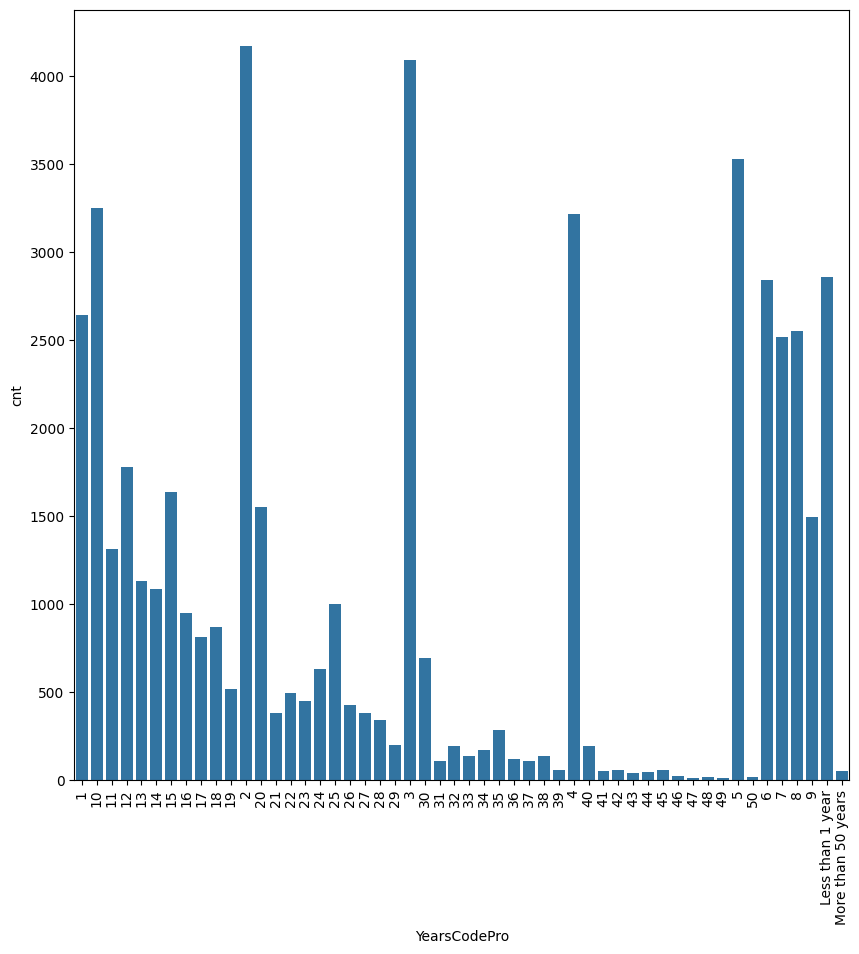

In [46]:
plt.figure(figsize=(10,10))
sns.barplot(x='YearsCodePro', y='cnt', data=filtered)
plt.xticks(rotation=90)

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [79]:
columns =  pd.read_sql_query('''select distinct(Age) from main''',conn)
columns = columns['Age'].tolist()
columns

['Under 18 years old',
 '35-44 years old',
 '45-54 years old',
 '18-24 years old',
 '25-34 years old',
 '55-64 years old',
 'Prefer not to say',
 '65 years or older']

histogram for: Under 18 years old


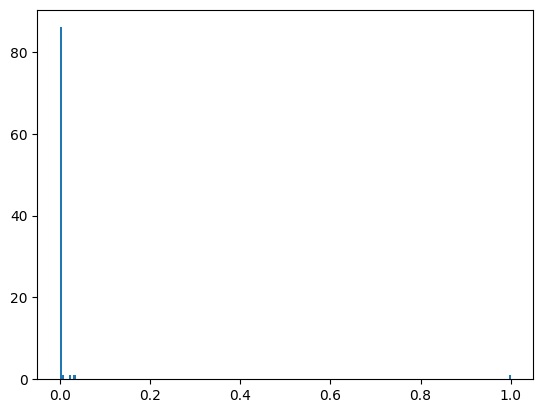

histogram for: 35-44 years old


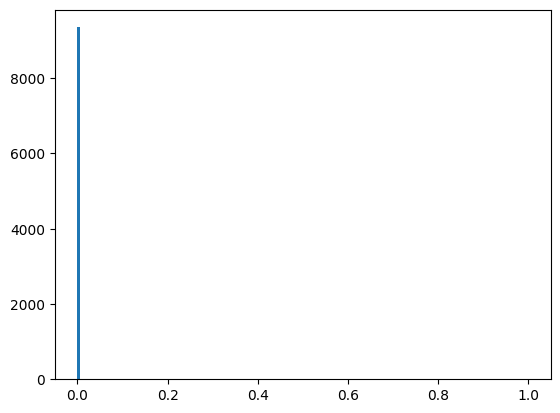

histogram for: 45-54 years old


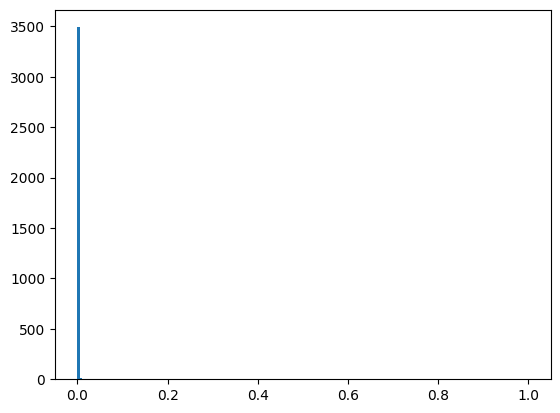

histogram for: 18-24 years old


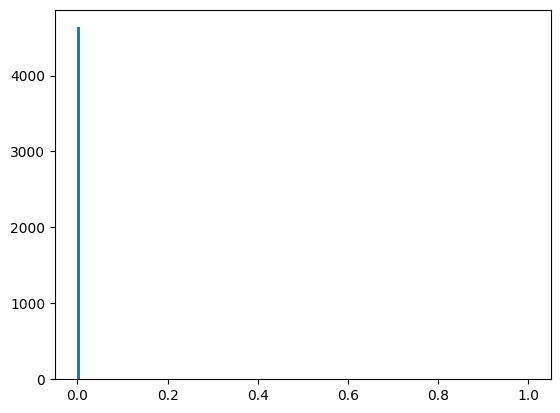

histogram for: 25-34 years old


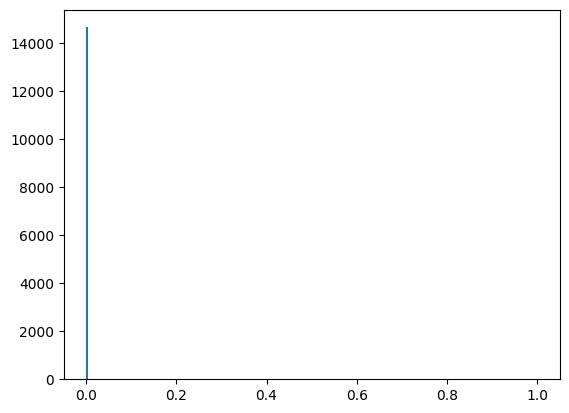

histogram for: 55-64 years old


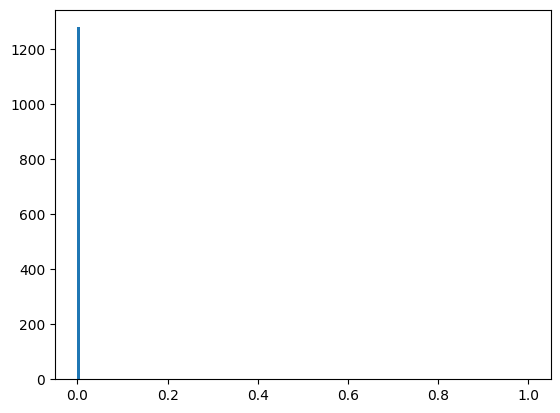

histogram for: Prefer not to say


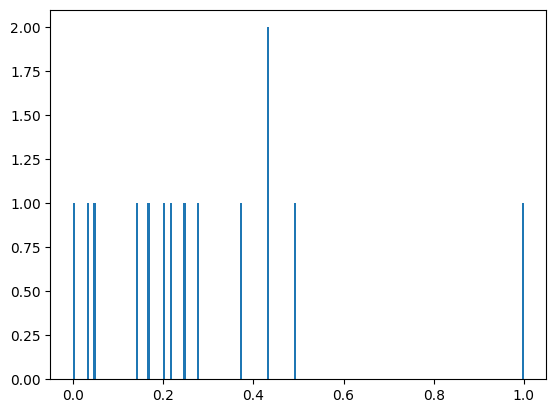

histogram for: 65 years or older


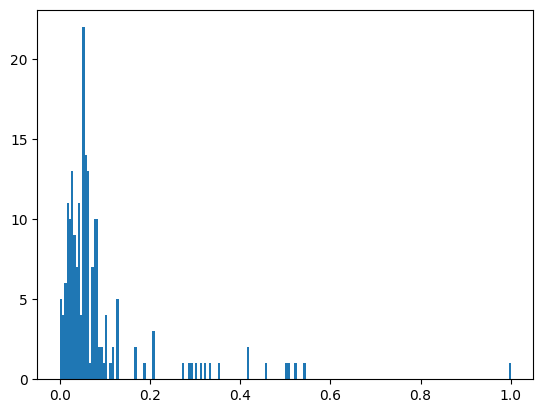

In [99]:
## Write your code here
for column in columns:
    
    filtered = pd.read_sql_query(f"""select Age, CompTotal from main where Age is '{column}'""",conn)
    filtered = filtered.dropna()
    filtered['CompTotal'] = filtered['CompTotal'].apply(lambda x : (x-filtered['CompTotal'].min())/(filtered['CompTotal'].max()-filtered['CompTotal'].min()))
    print('histogram for:', column)
    plt.hist(x=filtered['CompTotal'], bins=200)
    plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


histogram for: Under 18 years old


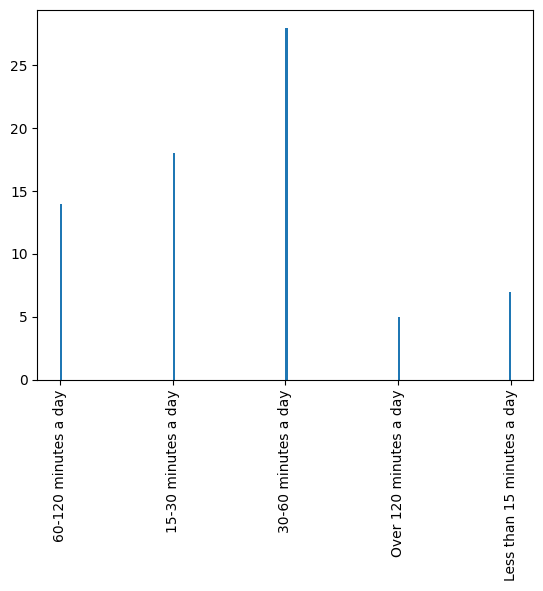

histogram for: 35-44 years old


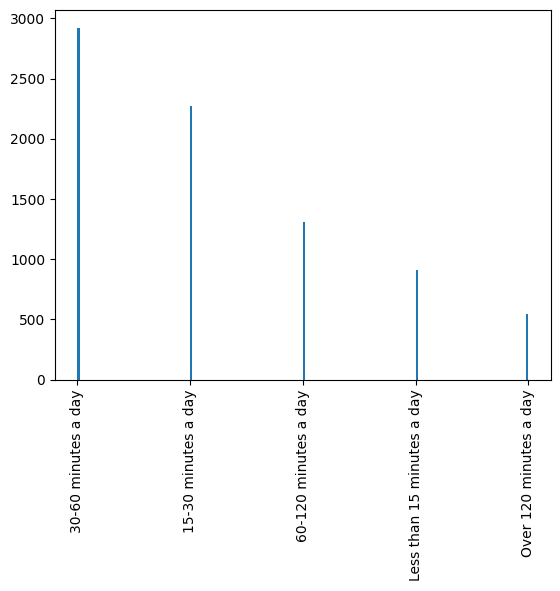

histogram for: 45-54 years old


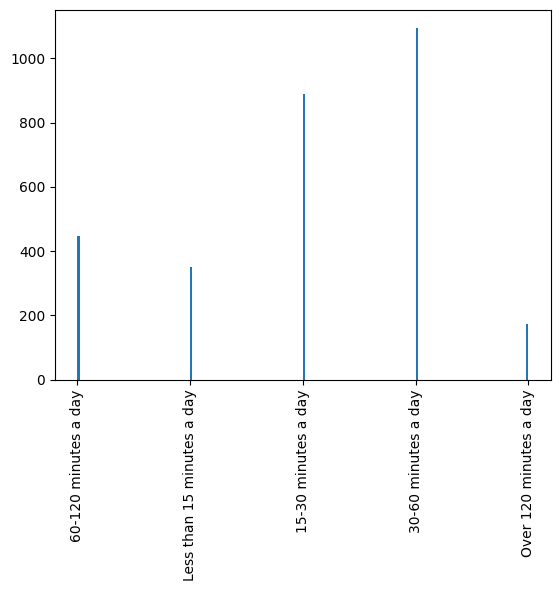

histogram for: 18-24 years old


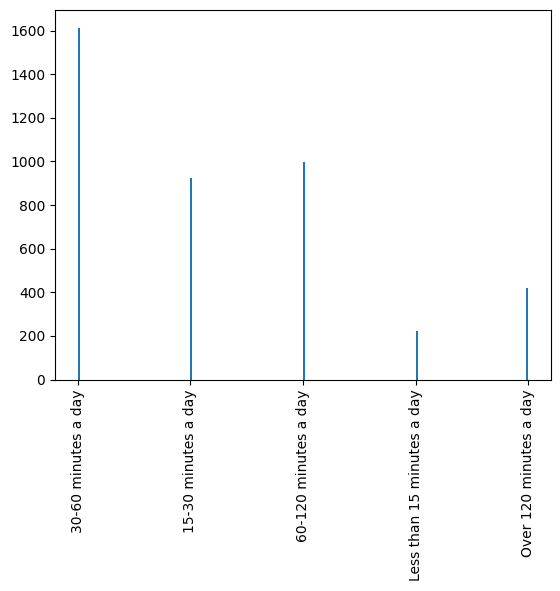

histogram for: 25-34 years old


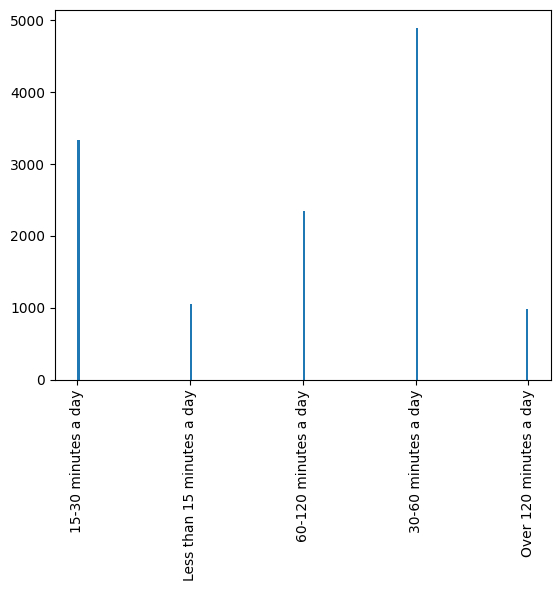

histogram for: 55-64 years old


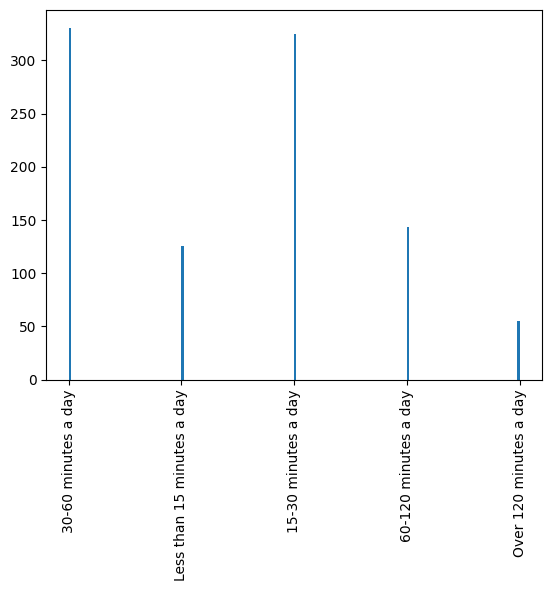

histogram for: Prefer not to say


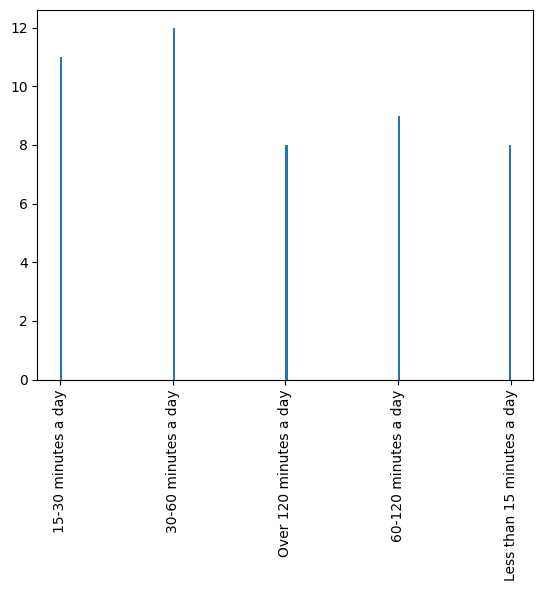

histogram for: 65 years or older


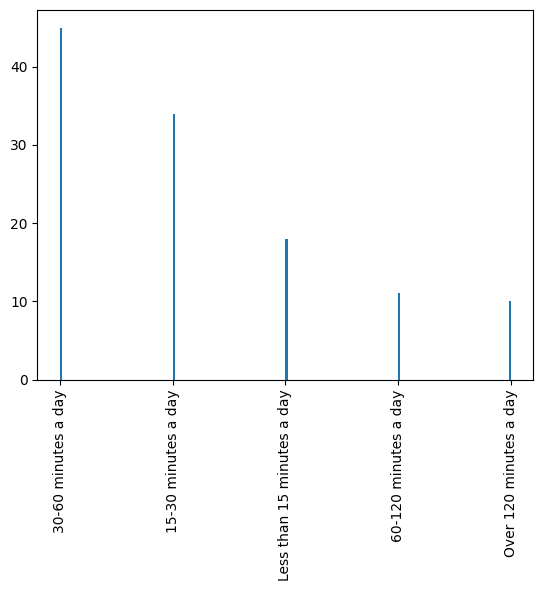

In [102]:
## Write your code here
columns = pd.read_sql_query('''select distinct(Age) from main''', conn)
columns = columns['Age'].tolist()

## Write your code here
for column in columns:
    filtered = pd.read_sql_query(f"""select Age, TimeSearching from main where Age is '{column}'""", conn)
    filtered = filtered.dropna()
  
    print('histogram for:', column)
    plt.hist(x=filtered['TimeSearching'], bins=200)
    plt.xticks(rotation=90)
    plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [104]:
## Write your code here
filtered = pd.read_sql_query(f"""select DatabaseWantToWorkWith, count(DatabaseWantToWorkWith) as counts 
                                 from main
                                 group by DatabaseWantToWorkWith
                                 order by counts desc 
                                 limit 5""", conn)
filtered = filtered.dropna()
filtered

,DatabaseWantToWorkWith,counts
0,PostgreSQL,3738
1,PostgreSQL;SQLite,1533
2,SQLite,1476
3,Microsoft SQL Server,1431
4,MySQL,1139


<BarContainer object of 5 artists>

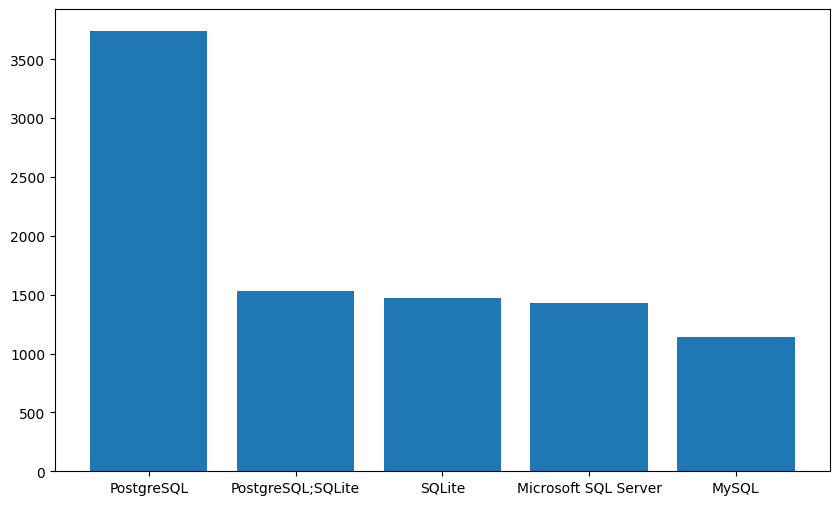

In [106]:
plt.figure(figsize=(10,6))
plt.bar(x=filtered['DatabaseWantToWorkWith'], height=filtered['counts'])

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [107]:
## Write your code here
filtered = pd.read_sql_query(f"""select RemoteWork from main""", conn)
filtered = filtered.dropna()
filtered

,RemoteWork
0,Remote
1,Remote
2,Remote
6,Remote
8,In-person
...,...
65431,"Hybrid (some remote, some in-person)"
65432,Remote
65433,Remote
65434,In-person


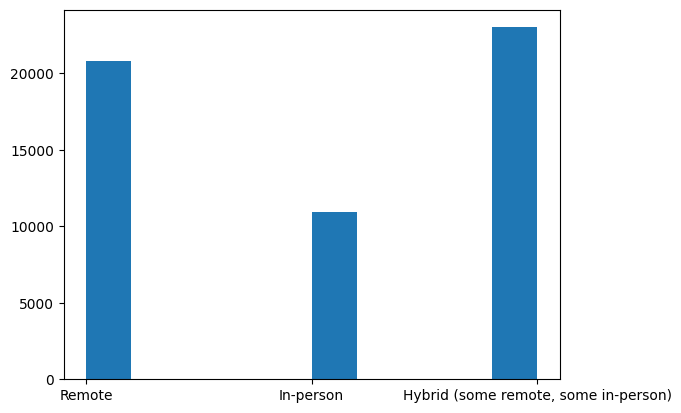

In [109]:
plt.hist(data = filtered, x = 'RemoteWork')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [110]:
def get_age_midpoint(age_range):
    if age_range == 'Under 18 years old':
        return 17  # Assuming average of 0-17
    elif age_range == '65 years or older':
        return 75  # Assuming average of 65-85
    elif age_range == 'Prefer not to say':
        return None
    else:
        ages = [int(x) for x in age_range.split()[0].split('-')]
        return sum(ages) / 2

In [117]:
## Write your code here
filtered = pd.read_sql_query('''select CompTotal, Age from main''',conn)
filtered = filtered.dropna()
filtered['Age'] = filtered['Age'].apply(get_age_midpoint)
filtered = filtered[(filtered['Age'] > 44) & (filtered['Age'] < 61)]
filtered

,CompTotal,Age
395,95000.0,49.5
398,195000.0,49.5
409,54000.0,59.5
414,145000.0,49.5
424,80000.0,59.5
...,...,...
65178,40000.0,49.5
65247,250000.0,49.5
65269,250000.0,49.5
65270,157000.0,49.5


In [121]:
import numpy as np

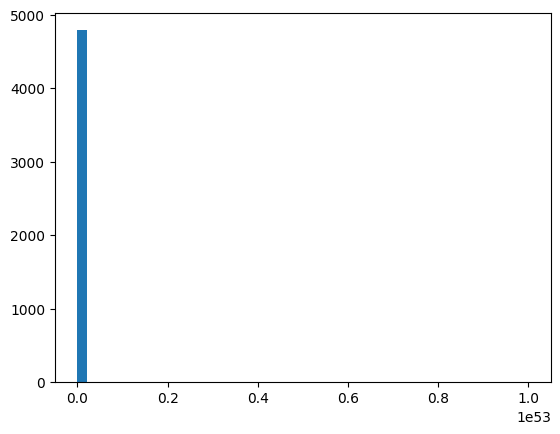

In [123]:
bins = np.linspace(filtered['CompTotal'].min(),
                   filtered['CompTotal'].max(),
                   num=50)
plt.hist(filtered['CompTotal'], bins=bins)
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [127]:
## Write your code here
filtered = pd.read_sql_query('''select avg(JobSat) as avg_jobsat, YearsCodePro from main group by YearsCodePro''',conn)
filtered = filtered.dropna()
filtered

,avg_jobsat,YearsCodePro
1,6.757033,1
2,6.962461,10
3,7.060794,11
4,7.100810,12
5,7.099573,13
6,7.062003,14
7,7.179679,15
8,7.126516,16
9,7.135135,17
10,7.207224,18


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, '1'),
  Text(1, 0, '10'),
  Text(2, 0, '11'),
  Text(3, 0, '12'),
  Text(4, 0, '13'),
  Text(5, 0, '14'),
  Text(6, 0, '15'),
  Text(7, 0, '16'),
  Text(8, 0, '17'),
  Text(9, 0, '18'),
  Text(10, 0, '19'),
  Text(11, 0, '2'),
  Text(12, 0, '20'),
  Text(13, 0, '21'),
  Text(14, 0, '22'),
  Text(15, 0, '23'),
  Text(16, 0, '24'),
  Text(17, 0, '25'),
  Text(18, 0, '26'),
  Text(19, 0, '27'),
  Text(20, 0, '28'),
  Text(21, 0, '29'),
  Text(22, 0, '3'),
  Text(23, 0, '30'),
  Text(24, 0, '31'),
  Text(25, 0, '32'),
  Text(26, 0, '33'),
  Text(27, 0, '34'),
  Text(28, 0, '35'),
  Text(29, 0, '36'),
  Text(30, 0, '37'),
  Text(31, 0, '38'),
  Text(32, 0, '39'),
  Text(33, 0, '4'

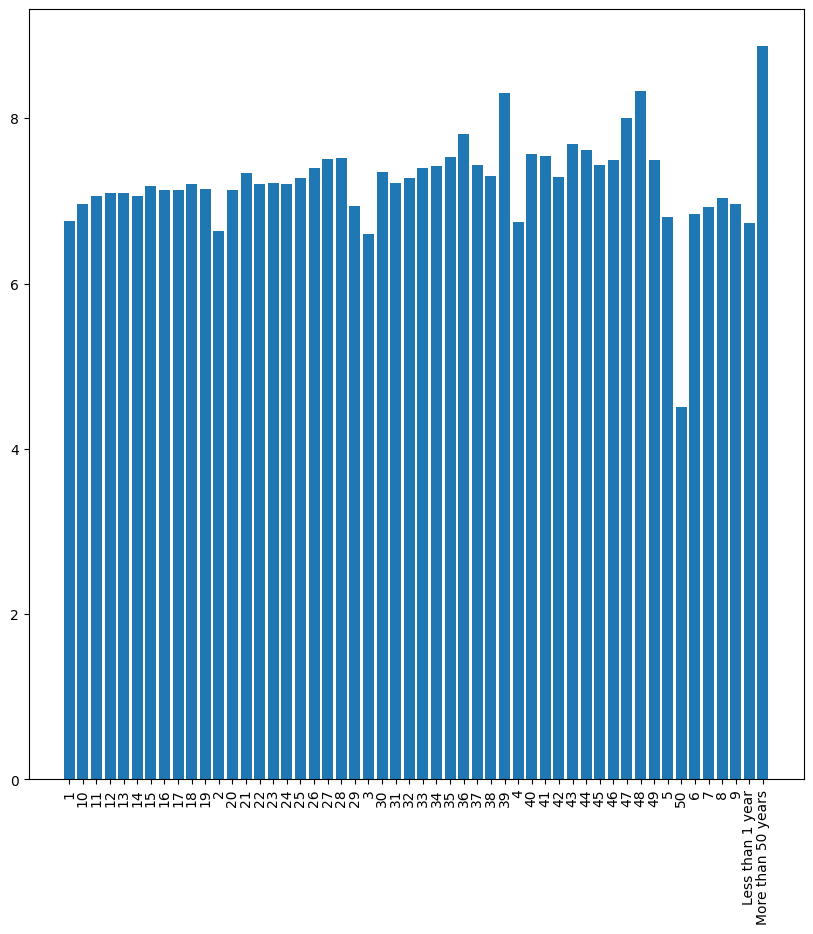

In [129]:
plt.figure(figsize=(10,10))
plt.bar(x='YearsCodePro', height='avg_jobsat', data=filtered)
plt.xticks(rotation=90)

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [131]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
